# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [8]:
# Q1 (code)
! pip install tomotopy
! pip install little-mallet-wrapper

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
import pandas as pd
trump_data = pd.read_csv('trump_tweets.csv')
sanders_data = pd.read_csv('sanders_tweets.csv')

frames = [trump_data, sanders_data]
all_tweets = pd.concat(frames)

all_tweets.head()

,Username,TweetId,Title,Content
0,@realDonaldTrump,822421390125043713,@realDonaldTrump_822421390125043713,It all begins today! I will see you at 11:00 ...
1,@realDonaldTrump,822501803615014918,@realDonaldTrump_822501803615014918,Today we are not merely transferring power fr...
2,@realDonaldTrump,822501939267141634,@realDonaldTrump_822501939267141634,"power from Washington, D.C. and giving it bac..."
3,@realDonaldTrump,822502135233384448,@realDonaldTrump_822502135233384448,What truly matters is not which party control...
4,@realDonaldTrump,822502270503972872,@realDonaldTrump_822502270503972872,"January 20th 2017, will be remembered as the ..."


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [4]:
import pandas as pd
import seaborn
import numpy
import tomotopy as tp
import little_mallet_wrapper
from pathlib import Path
import re

In [5]:
# Q3 (code)
training_data = []
original_texts = []
titles = []

for index, row in all_tweets.iterrows():
    text = row['Content']
    author = row['Username']
    tweet_id = row['TweetId']
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove', lowercase=True, remove_stop_words=True, remove_punctuation=True)
    # Tip: add the following line to remove URLS and user mentions
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    
    # training data list
    training_data.append(processed_text)
    
    # Original texts list
    original_texts.append(text)
    
    # Titles list
    titles.append(f"{author}_{tweet_id}")
    
# Example output
print(training_data[:10])
print(original_texts[:10])
print(titles[:10])
    

['begins today see swearing movement continues work begins', 'today merely transferring power one administration another one party another transferring', 'power washington giving back american people inaugurationday', 'truly matters party controls government whether government controlled people', 'january remembered day people became rulers nation', 'forgotten men women country forgotten longer moment äôs going americafirst', 'bring back jobs bring back borders bring back wealth bring back dreams', 'follow two simple rules buy american hire american inaugurationday maga', 'time remember  //www facebook com/donaldtrump/posts/', 'americans every city near far small large mountain mountain  //www facebook com/donaldtrump/posts/']
[' It all begins today! I will see you at 11:00 A.M. for the swearing-in. THE MOVEMENT CONTINUES - THE WORK BEGINS!', ' Today we are not merely transferring power from one Administration to another, or from one party to another‚ Äì but we are transferring...', ' 

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [12]:
# Q4 (code)
num_topics = 15
num_topic_words = 7

model = tp.LDAModel(k=num_topics)

for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.718720960321173
Iteration: 10	Log-likelihood: -9.313449241712854
Iteration: 20	Log-likelihood: -9.132692734634503
Iteration: 30	Log-likelihood: -9.03513881972765
Iteration: 40	Log-likelihood: -8.982122954590071
Iteration: 50	Log-likelihood: -8.941121234754167
Iteration: 60	Log-likelihood: -8.905891076867002
Iteration: 70	Log-likelihood: -8.874392669505276
Iteration: 80	Log-likelihood: -8.854995459209377
Iteration: 90	Log-likelihood: -8.834508794152809


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [13]:
# Q5a (code)
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

election trump foxnews tonight fraud vote voter

✨Topic 1✨

american america president today thank great day

✨Topic 2✨

great thank president today house whitehouse white

✨Topic 3✨

border wall get democrats country want great

✨Topic 4✨

united states war president trump iran korea

✨Topic 5✨

trump fbi court campaign hillary obama clinton

✨Topic 6✨

must people change american country trump climate

✨Topic 7✨

biden trump joe president left radical democrats

✨Topic 8✨

news fake media people cnn even story

✨Topic 9✨

coronavirus covid people federal help family government

✨Topic 10✨

tax workers wage pay billion class million

✨Topic 11✨

democrats president impeachment house nothing witch senate

✨Topic 12✨

great vote state total endorsement strong complete

✨Topic 13✨

health care people americans must right need

✨Topic 14✨

great years china much many country big



# Q5b (words)
# Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

✨Topic 0✨: This first topic refers to elections, fraud and foxnews. This might be linked to the fact that foxnews is considered a pro-republican newsoutlet. They probably have claimed, as Trump did, that there was voting frauds during the last election, to justify the fact that he lost the election. 

✨Topic 1✨: This topic is not very specific. It is quite generic and I think it would fit both Sanders and Trump. 

✨Topic 2✨: The same goes for this topic, although it mentions the White House so I would assume it is a topic maybe is is more linked to Trump who was president than to Sanders who was candidate. 

✨Topic 3✨: This topic seems to refer to Trumps border wall idea with Mexico, which has been a recurrent discussion during his mandate. 

✨Topic 4✨: This topic refers to the war and countries such as Iran and Korea. It is linked to international politics of the US that Trump mentioned a lot during his presidency. 

✨Topic 5✨: This topic refers to the FBI and the court, it also refers to everal democrats (former president Obama and candidate Clinton). There is also a mention of Trump, who we know had quite. few issues with justice. 

✨Topic 6✨: This topic I feel like is not vey clear. The words are not very idicativ of anything except that they refer to climate change and to Trump. 

✨Topic 7✨: This topic refers to the democrates and to biden and to trump. It is also hard to be exactly sure but this might be a reference to the politial general view  that Trump had about democrats being left radicals and communists. 

✨Topic 8✨: The topic clearly refers to media matters. It mentions the media outlet CNN, but also fake news. This topic is linked to the whole disocurs around fake news that Trump had / has. 

✨Topic 9✨: This topic makes direct reference to  coronavirus, and it kind of seems to make a link to the help that people got during the covid time. 

✨Topic 10✨: This topic makes reference to issues of national matters: tax workers, wage etc. It could also be an issue adressed by either politicans. 

✨Topic 11✨: Topic 11 makes a reference to the impeachment which is obviouly linked to Trumps presidency. There is also the keyword "witch", which makes me think of witch hunt, which is an expression that has been used by Trump before. The topic also refers to democrates and the senate.

✨Topic 12✨: This is part of these topics where I think the reference is not super clear. It refers to a vote and the senate and endorsment but the it does not say anything about which vote. 

✨Topic 13✨: This topic refers to national matter of healthcare. It seems that the topic is refering to health care as a right for the americans. It does make me think of values of the democrats (mainly thinking about obamacare for example). 

✨Topic 14✨: This topic concerns international relations. It refers to china but it is difficult to know exactly to what it refers. As we know China was always a big subject in Trumps discours but the keywords do not give off any indication on the political value of the topic. 

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [14]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5877732954670984 
Per Topic: [0.6159496575593948, 0.5101531326770783, 0.5220555394887925, 0.4892223924398422, 0.5543548569083214, 0.6944173574447632, 0.5147195398807526, 0.5597496077418327, 0.6091063607484102, 0.5415733322501183, 0.6656867593526841, 0.6377327293157578, 0.7322709143161774, 0.6662105262279511, 0.503396725654602]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained 

1. Inital 15 Topic / 7 Words

The avarage coherence score for the 15 topics / 7 words is .587 which means that the topics are somewhat coherent but not completely. There's a variability among topics. Some are have a better coherence score but which never goes over .73. The lowest score is .48. The coherence is this quite moderate. 

2. 25 topics / 7 words

The cells here under show the result when I increased the number of topics but kept the same amout of words. The avarage score is only very slightly higher (.59) than the last one. There is also not that great of a change when looking at the individual scores. 

3. 30 topics / 7 words

I have once more increased the number of topics to 30 and the result has increased. The avarage is now .62 and thus the individual scores have also increased. So it seems that by increasing the topics, there is a better focus on making relevant clusters which result in a better coherence score. 


I still think that overall these results are only moderate. 

# second try (25-7)

In [48]:
num_topics = 25
num_topic_words = 7

model = tp.LDAModel(k=num_topics)

for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.857908793962537
Iteration: 10	Log-likelihood: -9.397197986709969
Iteration: 20	Log-likelihood: -9.219276709740495
Iteration: 30	Log-likelihood: -9.116640756058612
Iteration: 40	Log-likelihood: -9.046567281192216
Iteration: 50	Log-likelihood: -8.986914078622135
Iteration: 60	Log-likelihood: -8.945877878885216
Iteration: 70	Log-likelihood: -8.909465600914064
Iteration: 80	Log-likelihood: -8.882755363794827
Iteration: 90	Log-likelihood: -8.866196535094375


In [49]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5934584924280643 
Per Topic: [0.5639536872506141, 0.5987188816070557, 0.613565456867218, 0.5080952852964401, 0.6037571728229523, 0.49781872034072877, 0.5106078378856183, 0.7599685519933701, 0.5735866472125053, 0.5357743263244629, 0.4712234362959862, 0.6105035603046417, 0.6171435639262199, 0.6214275896549225, 0.6266501694917679, 0.5828029572963714, 0.5606602549552917, 0.5512681305408478, 0.5302528694272042, 0.7060914248228073, 0.7387574434280395, 0.5882703632116317, 0.6072564959526062, 0.654525101184845, 0.60378238260746]



# third try (30-7)

In [54]:
num_topics = 30
num_topic_words = 7

model = tp.LDAModel(k=num_topics)

for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.94367444025606
Iteration: 10	Log-likelihood: -9.471922658053236
Iteration: 20	Log-likelihood: -9.263121281061078
Iteration: 30	Log-likelihood: -9.144280842616295
Iteration: 40	Log-likelihood: -9.058355915295953
Iteration: 50	Log-likelihood: -8.995205904957873
Iteration: 60	Log-likelihood: -8.942420399637069
Iteration: 70	Log-likelihood: -8.903842431501094
Iteration: 80	Log-likelihood: -8.870066040069473
Iteration: 90	Log-likelihood: -8.845823015521841


In [56]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.6216860950241486 
Per Topic: [0.5123178496956825, 0.7656392157077789, 0.6267315059900284, 0.7296273678541183, 0.6169676534831524, 0.5184852659702301, 0.6604976773262023, 0.6593950152397156, 0.559048306941986, 0.689312481880188, 0.6166622869670391, 0.6748921327292919, 0.6755500882863998, 0.6351763099431992, 0.49362918734550476, 0.4521101161837578, 0.5662294954061509, 0.6671049684286118, 0.6396563410758972, 0.6038463264703751, 0.774262061715126, 0.7219830095767975, 0.683083000779152, 0.6286362156271934, 0.5290848433971405, 0.5611109167337418, 0.6853002309799194, 0.5545449286699295, 0.6546370476484299, 0.4950610026717186]



### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

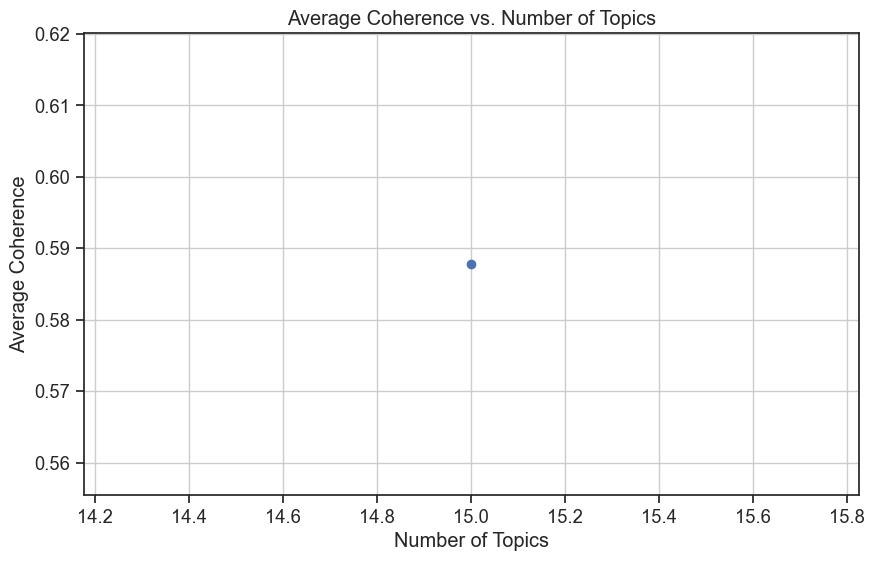

In [15]:
# X1 (code)
# Tip: y = average topic coherence; x = number of topics in the model
x = num_topics
y = average_coherence

import matplotlib.pyplot as plt

def plot_coherence(x_values, y_values):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, marker='o')
    plt.title('Average Coherence vs. Number of Topics')
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.grid(True)
    plt.show()
plot_coherence(x, y)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [16]:
# Q7a (code)
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]
topic_distributions[7]

[0.09171265,
 0.4323385,
 0.010786201,
 0.010533691,
 0.0076519484,
 0.008318263,
 0.012605152,
 0.010643922,
 0.011547397,
 0.008979171,
 0.008180292,
 0.09752942,
 0.007473839,
 0.2649766,
 0.0167229]

In [17]:
from IPython.display import Markdown, display
import re

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

In [27]:
get_top_docs(original_texts, topic_distributions, topic_index=13, n=2)

### ✨Topic 13✨

health care people americans must right need



---


✨  
**Topic Probability**: 0.9470080137252808  
**Document**: The American **people** **need** help and they **need** help now. That means any COVID-19 relief deal **must** include:

-$1,200 direct payments to the working class 
-No get-out-of-jail free card to corporations that put the lives of their workers and customers at risk https://t.co/0hNeyXB7El



✨  
**Topic Probability**: 0.9393880367279053  
**Document**:  I will be watching. HAVE A GREAT EASTER! https://t.co/wCa7u6qSnl



In [61]:
get_top_docs(original_texts, topic_distributions, topic_index=0, n=2)

### ✨Topic 0✨

election trump foxnews tonight fraud vote voter



---


✨  
**Topic Probability**: 0.9027020335197449  
**Document**: Have your prescriptions shot up in price? Are you splitting pills in half to make your prescriptions last longer? Have you had to stop taking medicine altogether in order to pay other bills? Tell Bernie your story. https://t.co/aByA6ckzOO



✨  
**Topic Probability**: 0.8969165086746216  
**Document**: Trump's strategy of hateful rhetoric and trying to divide the American people up is nothing new. It has been used by authoritarian leaders all over the world. Our job is stand together, fight back, and create the kind of country that we all know we can become. https://t.co/heqtyRDWzV



In [62]:
get_top_docs(original_texts, topic_distributions, topic_index=1, n=2)

### ✨Topic 1✨

american america president today thank great day



---


✨  
**Topic Probability**: 0.931165874004364  
**Document**:  China talks are going very well!



✨  
**Topic Probability**: 0.9282757639884949  
**Document**:  Yvette Herrell (@Yvette4Congress) is a proven fighter for New Mexico! She strongly supports our Brave Law Enforcement, Life and the Second Amendment. Strong on the Border and Trade, Yvette has my Complete and Total Endorsement! #NM02 https://t.co/77hjYfVWAB



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

Q7b (words)

Topic 13 feels like it is more representativ of Sanders, especially the first document. The second one is more general. I think that it is more representativ of Sanders because of the tone and the actual content of the first tweet which makes a point on helping and bringing financial relief for the american people during covid times. The second documents, when looking it up is actually a tweet by Trump. 

Topic 0, also has a high topic distribution. I first stated that i tought that this was very representativ of Trump, which it actually is but as it turns out it is a topic used and tweeted about by Sanders. Both the tweets were by him. 

Topic 1, which I though the keywords were not very indicativ turns out to have a high distribution score and both documents displayed are tweets by Trump. 

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [7]:
# Crete a sample of tweets
from random import sample
target_labels = sample(titles,100)

In [22]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='ticks', font_scale=1.2)
def plot_categories_by_topics_heatmap(labels,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': '})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot.
    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

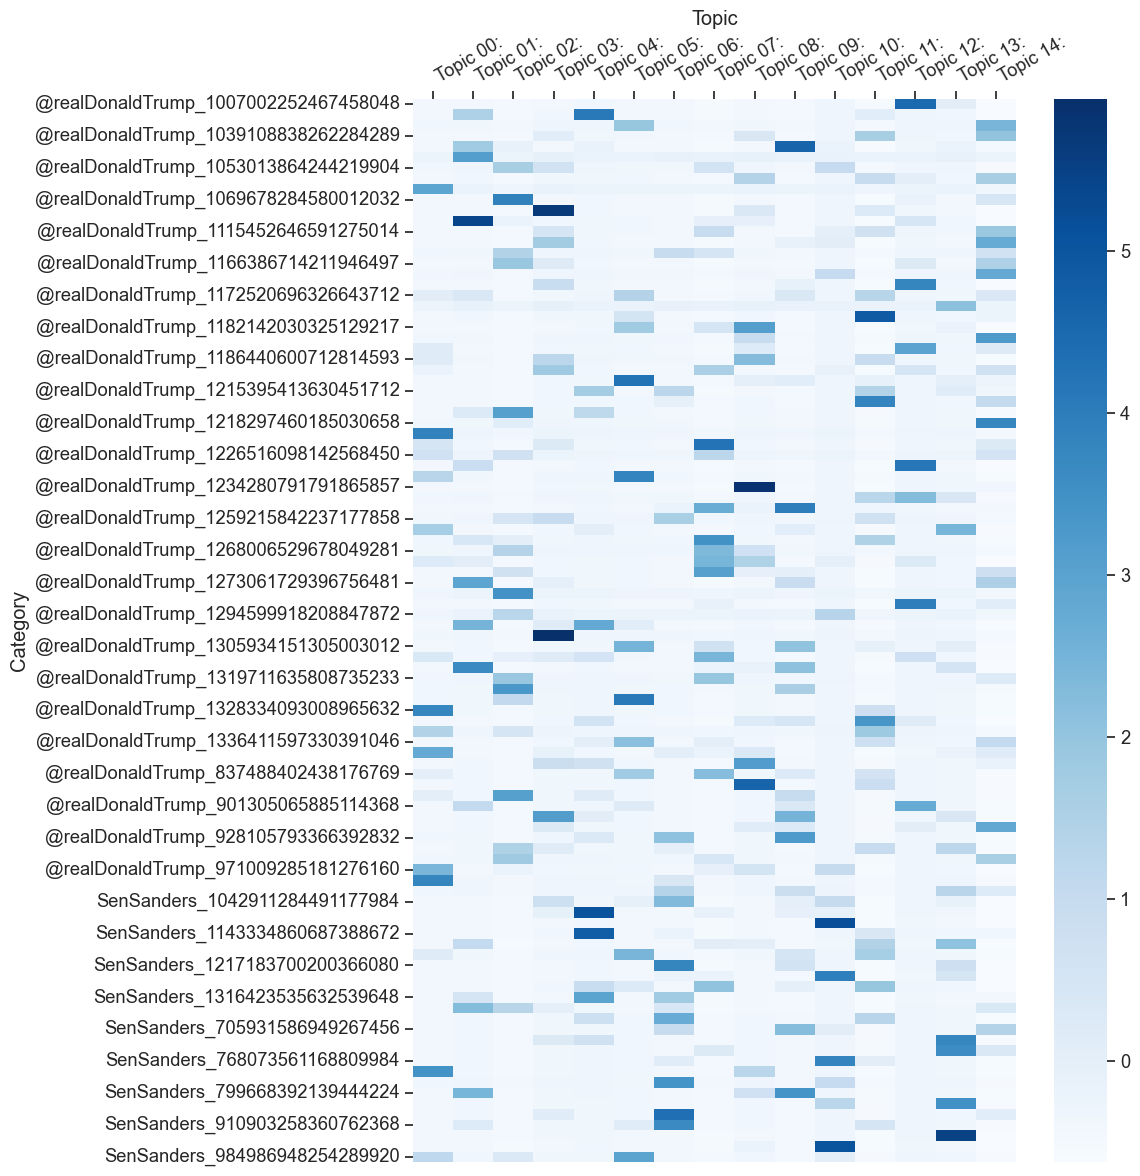

In [23]:
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  target_labels = target_labels,
                                  color_map = 'Blues',
                                 dim=(12,12))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

Q9 (words)

The heatmap shows some trends although I think it looks quit disperse. I can for example mention topic seven, which clearly is topic more likely for Trump. When looking up the most likey document from q7 linked to that topic, we find results that show that this regards Trump and some money laundering matter from 2019. The same goes for topic 14 which shows a trend in Trumps tweets. The topic contains keywords like "great years china much many country big", it is known that china has always been very present in Trump's discours. Furthermore, we also know tha he very regurlary uses the word Great, which is also part of his political slogan. 

The trend shows that topic 6 for example seems to be more likely for Sanders. The keywords for this topic are "must people change american country trump climate". Although, for me, the keywords are not very revealing, I can see how this would be morelikely for Sanders. The words climate and change are both present and I don't see any negative words that Trump usually uses to describe the matter. Topic 13, which concernes health care as a right is also not surprisingly more likely to Sanders. The topic of healthcare, has usually been a matter that democrats favor (i'm thinking of obamacare for example).

There are other very light trends such as topic 8 which is also more likely for Trump, which is not surprising since it has key words which refer to fake news and media etc. 

Overall, I feel like at a first glance, the heatmap shows that there are more topics linked to Trump (who is also over respresented in the random dampling) but once we have a closer look, we see that it's more dispersed and that there are clearly some that fit with Sanders more. 

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [20]:
from random import sample

sanders_tweets = [title for title in titles if 'SenSanders' in title]
sanders_sample_50 = sample(sanders_tweets, 50)

trump_tweets = [title for title in titles if '@realDonaldTrump' in title] 
trump_sample_50 = sample(trump_tweets, 50)

all_tweets = trump_sample_50 + sanders_sample_50 

#print("\nSanders Tweets (50):") 
#for tweet in sanders_50:
    #print(tweet)
    
#print("Trump Tweets (50):") 
#for tweet in trump_50:
    #print(tweet)

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)